In [4]:
# !pip install numpy pandas matplotlib seaborn scikit-learn

In [5]:
import sklearn

print(sklearn.__version__)

1.6.1


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

In [9]:
# Input Sentences
sentences = [
    "Mysterious unicorn sighted near a forest river",
    "Popcorn machine at the movie theater is a crowd favorite",
    "Sentence embeddings are useful",
    "This is another example",
    "Sentence transformers are powerful"
]


In [10]:
# Initiaalize the model
model = SentenceTransformer('all-MiniLM-L6-v2')

# # Encode sentences to get their embeddings
# embeddings = model.encode(sentences)


In [12]:
# Create embeddings for each sentence
embeddings = []

for sentence in sentences:
    print(f"Encoding: {sentence}")
    embedding = model.encode(sentence)
    embeddings.append(embedding)

Encoding: Mysterious unicorn sighted near a forest river
Encoding: Popcorn machine at the movie theater is a crowd favorite
Encoding: Sentence embeddings are useful
Encoding: This is another example
Encoding: Sentence transformers are powerful


In [13]:
# Convert the embeddings list to a numpy array
embeddings_array = np.array(embeddings)

print("Embeddings shape:", str(embeddings_array.shape))

print("Embeddings:", embeddings_array)

Embeddings shape: (5, 384)
Embeddings: [[ 0.07246959  0.06196792  0.0847856  ... -0.1021359   0.00317234
   0.02851711]
 [-0.05120908 -0.08695576 -0.02466656 ...  0.03946463  0.03425938
   0.03997695]
 [-0.000982   -0.03933427  0.05628785 ...  0.15092778  0.03324617
  -0.015021  ]
 [ 0.03428782 -0.00568265 -0.04741672 ...  0.00670439  0.07644547
   0.04468457]
 [-0.02104627  0.03925686  0.01958776 ...  0.06583401  0.07473505
  -0.03492619]]


In [14]:
# Perform PCA to reduce the dimensionality of the embeddings from 384 to 2.
pca = PCA(n_components=2)
pca.fit(embeddings_array)
new_embeddings = pca.transform(embeddings_array)

print("New Embeddings shape:", str(new_embeddings.shape))
print("New Embeddings:", new_embeddings)

New Embeddings shape: (5, 2)
New Embeddings: [[ 0.9690194  -0.11944997]
 [-0.20113204  0.7778734 ]
 [-0.33911628 -0.4175282 ]
 [-0.06544805  0.14466214]
 [-0.36332345 -0.38555732]]


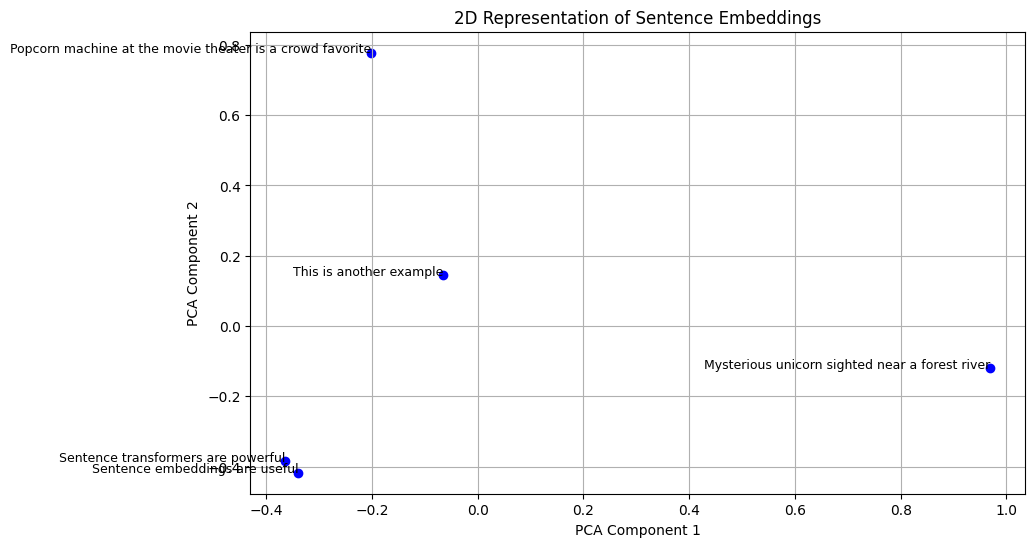

In [15]:
# Plot the 2D  representation of the embeddings
plt.figure(figsize=(10, 6))
plt.scatter(new_embeddings[:, 0], new_embeddings[:, 1], marker='o', color='blue')

# Annotate each point with the corresponding sentence
for i, sentence in enumerate(sentences):
    # plt.annotate(sentence, (new_embeddings[i, 0], new_embeddings[i, 1]), fontsize=9)
    plt.text(new_embeddings[i, 0], new_embeddings[i, 1], sentence, fontsize=9, ha = 'right')

# Add Labels and title
plt.title('2D Representation of Sentence Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Show the plot
plt.grid()
plt.show()

# Playing with Quora Dataset

In [18]:
# !pip3 install datasets

In [ ]:
from datasets import load_dataset
from sentence_transformers import SentenceTransformer, util
import os
import time

In [ ]:
dataset = load_dataset("quora", split='train[100000:150000]', trust_remote_code = True)

Generating train split: 100%|██████████| 404290/404290 [00:08<00:00, 47080.80 examples/s]


In [21]:
print("Dataset loaded. Number of samples:", len(dataset))

Dataset loaded. Number of samples: 50000


In [22]:
dataset[:5]

{'questions': [{'id': [165932, 165933],
   'text': ['What should I ask my friend to get from UK to India?',
    'What is the process of getting a surgical residency in UK after completing MBBS from India?']},
  {'id': [123111, 39307],
   'text': ['How can I learn hacking for free?',
    'How can I learn to hack seriously?']},
  {'id': [165934, 165935],
   'text': ['Which is the best website to learn programming language C++?',
    'Which is the best website to learn C++ Programming language for free?']},
  {'id': [165936, 165937],
   'text': ['What did Werner Heisenberg mean when he said, “The first gulp from the glass of natural sciences will turn you into an atheist, but at the bottom of the glass God is waiting for you”?',
    'What did God mean when He said "an eye for an eye "?']},
  {'id': [165938, 165939],
   'text': ['What is the first thing I should learn after learning basic commands in Linux?',
    'What other things should I learn in Linux?']}],
 'is_duplicate': [False, Tru

In [ ]:
questions = []
for record in dataset['questions']:
    questions.extend(record['text'])

question = list(set(questions))
print('\n'.join(question[:10]))
print("-"* 50)

print(f"Number of unique questions: {len(question)}")



Something simple, yet important. Why should I vote for Hillary Clinton?
Why is SEO important for a local business?
What's a good, all-around single-engine plane for recreational use for a first-time buyer?
What are the most important lessons you have learned in your life and when did you learn them?
How was Agni 5 missile tested for range?
Who would you choose, the one you love or the one who loves you, and why?
What kind of content should I post in my Facebook page to earn money?
What's the future scope of PSU in India?
Can I come out of the terminal at the airport and go into the visiting area between my connecting flights?
--------------------------------------------------
Number of unique questions: 88720


In [27]:
# Model initialization
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the questions to get their embeddings
query = "What is the capital of France?"
embedding = model.encode(query)
# embedding = model.encode(query, convert_to_tensor=True, show_progress_bar=True)


In [28]:
embedding.shape

(384,)

In [29]:
embedding

array([ 8.20480958e-02,  3.60555016e-02, -3.89287248e-03, -4.88103786e-03,
        2.56510973e-02, -5.71434535e-02,  1.21915871e-02,  4.67894645e-03,
        3.49498726e-02, -2.24219151e-02, -8.00526049e-03, -1.09353550e-01,
        2.27247551e-02, -2.93208603e-02, -4.35220338e-02, -1.20241180e-01,
       -8.48614960e-04, -1.81501191e-02,  5.61295673e-02,  3.08526657e-03,
        2.33638287e-03, -1.68393031e-02,  6.36246726e-02, -2.36602258e-02,
        3.14935073e-02, -3.47979367e-02, -2.05488149e-02, -2.79096863e-03,
       -1.10379979e-02, -3.61267142e-02,  5.41410632e-02, -3.66171375e-02,
       -2.50086598e-02, -3.81704159e-02, -4.96036187e-02, -1.51480995e-02,
        2.13150214e-02, -1.27404444e-02,  7.67008960e-02,  4.43557650e-02,
       -1.08348858e-02, -2.97599789e-02, -1.69704612e-02, -2.46918667e-02,
        8.08710884e-03,  4.35876735e-02,  7.17748795e-03,  7.55012929e-02,
        3.28066573e-02, -6.20464347e-02,  6.67789951e-02,  2.70913318e-02,
       -4.56894450e-02, -

In [26]:
# Load the dataset and encode the questions
batch_size = 32
vector_limit = 1000

questions = questions[:vector_limit]

import json
from tqdm import tqdm

for i in tqdm(range(0, len(questions), batch_size)):
    # Find end of the current batch
    end = min(i + batch_size, len(questions))

    # Create IDs for the current batch
    ids = [f"question_{j}" for j in range(i, end)]

    # Create Metadata for the current batch
    metadata = [{"question": text} for text in questions[i:end]]

    # Create a batch of embeddings
    batch_embeddings = model.encode(questions[i:end])

    # Save the embeddings to a JSON file
    with open(f"embeddings_batch_{i // batch_size}.json", "w") as f:
        json.dump({
            "ids": ids,
            "embeddings": batch_embeddings.tolist(),
            "metadata": metadata
        }, f)
    print(f"Saved batch {i // batch_size} with {len(ids)} embeddings.")
    time.sleep(1)  # Sleep to avoid overwhelming the system

    # Create records list for upsert
    records = zip(ids, batch_embeddings.tolist(), metadata)

    # Now could upsert these records into a vector database
    # For example, if using Pinecone:
    # pinecone.upsert(records, namespace="quora_questions")


  0%|          | 0/32 [00:00<?, ?it/s]

Saved batch 0 with 32 embeddings.


  3%|▎         | 1/32 [00:03<01:53,  3.66s/it]

Saved batch 1 with 32 embeddings.


  6%|▋         | 2/32 [00:04<01:07,  2.24s/it]

Saved batch 2 with 32 embeddings.


  9%|▉         | 3/32 [00:06<00:54,  1.87s/it]

Saved batch 3 with 32 embeddings.


 12%|█▎        | 4/32 [00:07<00:44,  1.59s/it]

Saved batch 4 with 32 embeddings.


 16%|█▌        | 5/32 [00:08<00:38,  1.42s/it]

Saved batch 5 with 32 embeddings.


 19%|█▉        | 6/32 [00:09<00:35,  1.36s/it]

Saved batch 6 with 32 embeddings.


 22%|██▏       | 7/32 [00:10<00:31,  1.27s/it]

Saved batch 7 with 32 embeddings.


 25%|██▌       | 8/32 [00:12<00:29,  1.22s/it]

Saved batch 8 with 32 embeddings.


 28%|██▊       | 9/32 [00:13<00:27,  1.18s/it]

Saved batch 9 with 32 embeddings.


 31%|███▏      | 10/32 [00:14<00:25,  1.16s/it]

Saved batch 10 with 32 embeddings.


 34%|███▍      | 11/32 [00:15<00:24,  1.18s/it]

Saved batch 11 with 32 embeddings.


 38%|███▊      | 12/32 [00:16<00:22,  1.15s/it]

Saved batch 12 with 32 embeddings.


 41%|████      | 13/32 [00:17<00:22,  1.19s/it]

Saved batch 13 with 32 embeddings.


 44%|████▍     | 14/32 [00:18<00:20,  1.17s/it]

Saved batch 14 with 32 embeddings.


 47%|████▋     | 15/32 [00:20<00:19,  1.16s/it]

Saved batch 15 with 32 embeddings.


 50%|█████     | 16/32 [00:21<00:18,  1.13s/it]

Saved batch 16 with 32 embeddings.


 53%|█████▎    | 17/32 [00:22<00:16,  1.12s/it]

Saved batch 17 with 32 embeddings.


 56%|█████▋    | 18/32 [00:23<00:15,  1.11s/it]

Saved batch 18 with 32 embeddings.


 59%|█████▉    | 19/32 [00:24<00:14,  1.12s/it]

Saved batch 19 with 32 embeddings.


 62%|██████▎   | 20/32 [00:25<00:13,  1.12s/it]

Saved batch 20 with 32 embeddings.


 66%|██████▌   | 21/32 [00:26<00:12,  1.11s/it]

Saved batch 21 with 32 embeddings.


 69%|██████▉   | 22/32 [00:27<00:11,  1.11s/it]

Saved batch 22 with 32 embeddings.


 72%|███████▏  | 23/32 [00:28<00:10,  1.12s/it]

Saved batch 23 with 32 embeddings.


 75%|███████▌  | 24/32 [00:30<00:09,  1.14s/it]

Saved batch 24 with 32 embeddings.


 78%|███████▊  | 25/32 [00:31<00:07,  1.12s/it]

Saved batch 25 with 32 embeddings.


 81%|████████▏ | 26/32 [00:32<00:06,  1.11s/it]

Saved batch 26 with 32 embeddings.


 84%|████████▍ | 27/32 [00:33<00:05,  1.10s/it]

Saved batch 27 with 32 embeddings.


 88%|████████▊ | 28/32 [00:34<00:04,  1.10s/it]

Saved batch 28 with 32 embeddings.


 91%|█████████ | 29/32 [00:35<00:03,  1.12s/it]

Saved batch 29 with 32 embeddings.


 94%|█████████▍| 30/32 [00:36<00:02,  1.13s/it]

Saved batch 30 with 32 embeddings.


 97%|█████████▋| 31/32 [00:37<00:01,  1.12s/it]

Saved batch 31 with 8 embeddings.


100%|██████████| 32/32 [00:39<00:00,  1.23s/it]


In [ ]:
# Helper fnction so we can repeat queries later
def run_query(query):
    embedding = model.endcode(query).tolist()
    print(f"Query: {query}")
    print(f"Embedding: {embedding}")
    result = util.semantic_search(embedding, embeddings, top_k=5)
    print(f"Top 5 results for query '{query}':") 